In [110]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [111]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [112]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
data= pd.read_csv('F:/EducationalData/Simplilearn/ML/Files/datasets/sentiment.csv')
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [114]:
data=data[['text','sentiment']]

In [115]:
data.head(2)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive


In [116]:
train,test =train_test_split(data,test_size=0.1)

In [117]:
train=train[train.sentiment !="Neutral"]

In [118]:
train.head(4)

,text,sentiment
3239,Watching the GOP debate this morning ( yes I m...,Positive
12981,RT @cheeriogrrrl: The men on this stage think ...,Negative
12201,#PlannedParenthood should be funded in Florida...,Negative
35,RT @AmyMek: The Torched has been passed -&gt;....,Negative


In [119]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [120]:
def wordcloud_draw(data,color='green'):
    words= ' '.join(data)
    cleaned_word=" ".join([word for word in words.split()
                         if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud= WordCloud(stopwords=STOPWORDS,
                        background_color=color,
                        width=2500,
                        height=2000
                        ).generate(cleaned_word)
    plt.figure(1,figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

POSTITIVE WORDS


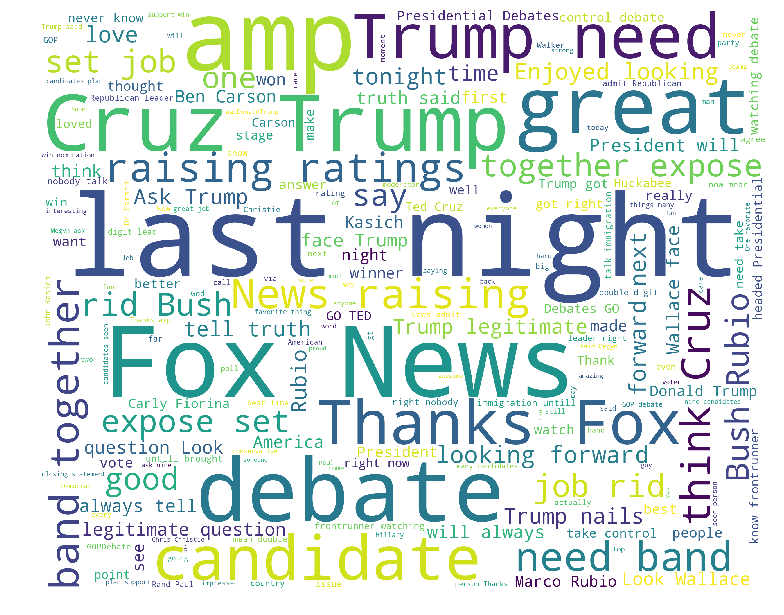

In [121]:
print("POSTITIVE WORDS")
wordcloud_draw(train_pos,'white')

NEGATIVEWORDS


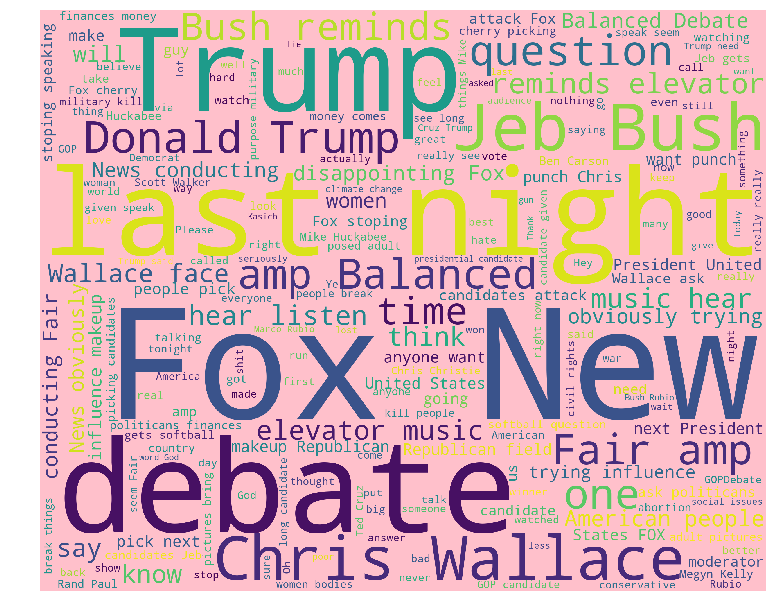

In [122]:
print("NEGATIVEWORDS")
wordcloud_draw(train_neg,'pink')

In [123]:
tweets = []
stopword_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned  = [word for word in words_filtered
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    #words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))
    
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']
    

In [124]:
# Extracting the word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all
    

def get_words_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_words_features(get_words_in_tweets(tweets))

def extract_features(documents):
    document_words =set(documents)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
        return features

Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

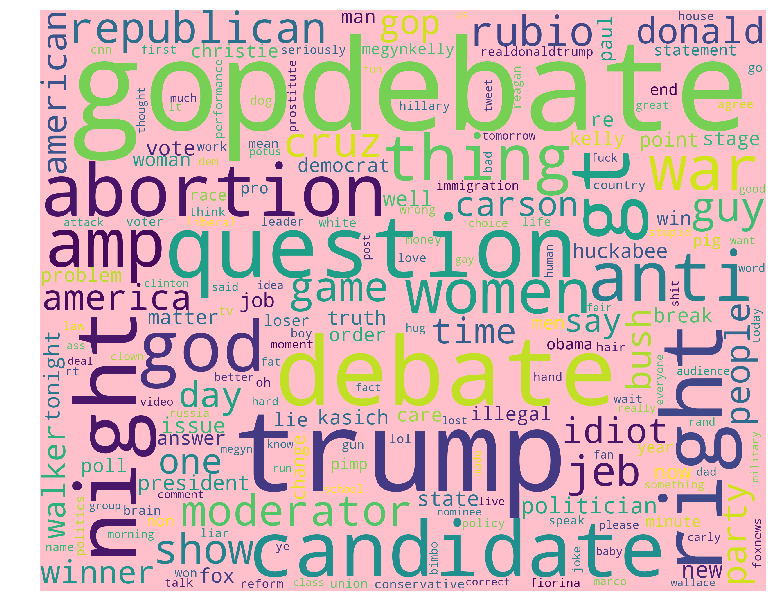

In [125]:
wordcloud_draw(w_features,'pink')

In [126]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier   = nltk.NaiveBayesClassifier.train(training_set)

In [127]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

[Negative]: 864/864 
[Positive]: 225/0 
